# Datathon 2023: D-One Challenge

In [1]:
# basic packages
import pandas as pd
import numpy as np

## Exploration

### Training Dataset

In [2]:
# import trainings
trainings = pd.read_csv('data/trainings.csv')

In [3]:
trainings.head()

,user_id,training_id,start_date,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power,type
0,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,b402af469b4988e3032cd38bdd857223e7fe8d319d4459...,2019-12-08 08:59:54 UTC,21100.0,304.0,303.0,5258.0,6.0,NaN,172,NaN,RACE
1,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,76b9f9be04b79a9a3329a4c925c74eef0ccee6f492caa4...,2019-10-20 09:00:04 UTC,21000.0,210.0,210.0,5086.0,8.5,NaN,235,NaN,RACE
2,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,e9ac936eb22b0994df03d81b6ebc1eabae05ef0d18dc04...,2019-09-08 08:00:19 UTC,21300.0,180.0,180.0,5049.0,9.5,NaN,175,NaN,RACE
3,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,aec2d658c0098a559716ad49efb6e7731b6b5a7cfde3e6...,2019-10-13 08:00:04 UTC,8000.0,390.0,141.0,2487.0,15.2,NaN,185,NaN,RACE
4,101fe9a1cf14890d1d02bb95e725cbb64156a8d13a876f...,eb34a62d420b0a5e1e5ccc4e8dd75b3a4bdca13a07d2ea...,2019-10-06 08:31:44 UTC,42200.0,127.0,127.0,18303.0,10.5,NaN,192,NaN,RACE


In [4]:
trainings.describe()

,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power
count,16348.000000,16351.000000,16351.000000,16348.000000,16352.000000,16308.000000,16352.000000,1405.000000
mean,11881.593284,155.853400,150.283074,4265.499021,12.379642,142.831739,164.375856,238.508897
std,6605.042528,262.248024,237.625779,2757.003421,8.032137,15.147707,17.735869,86.928587
min,1237.000000,0.000000,0.000000,0.000000,-16.300000,54.000000,0.000000,2.000000
25%,7885.750000,40.000000,40.000000,2791.000000,6.000000,133.000000,153.000000,202.000000
50%,10352.000000,85.000000,86.000000,3630.000000,12.500000,143.000000,165.000000,241.000000
75%,14208.000000,167.000000,168.000000,4851.500000,18.025000,153.000000,175.000000,283.000000
max,111000.000000,7673.000000,7674.000000,103512.000000,36.500000,259.000000,254.000000,470.000000


In [5]:
# check missing values
missing_values = trainings.isnull().sum()

print("Missing values: \n")
missing_values

Missing values: 



user_id            0
training_id        0
start_date         0
distance           4
uphill             1
downhill           1
duration           4
temperature        0
avg_hr            44
max_hr             0
power          14947
type             250
dtype: int64

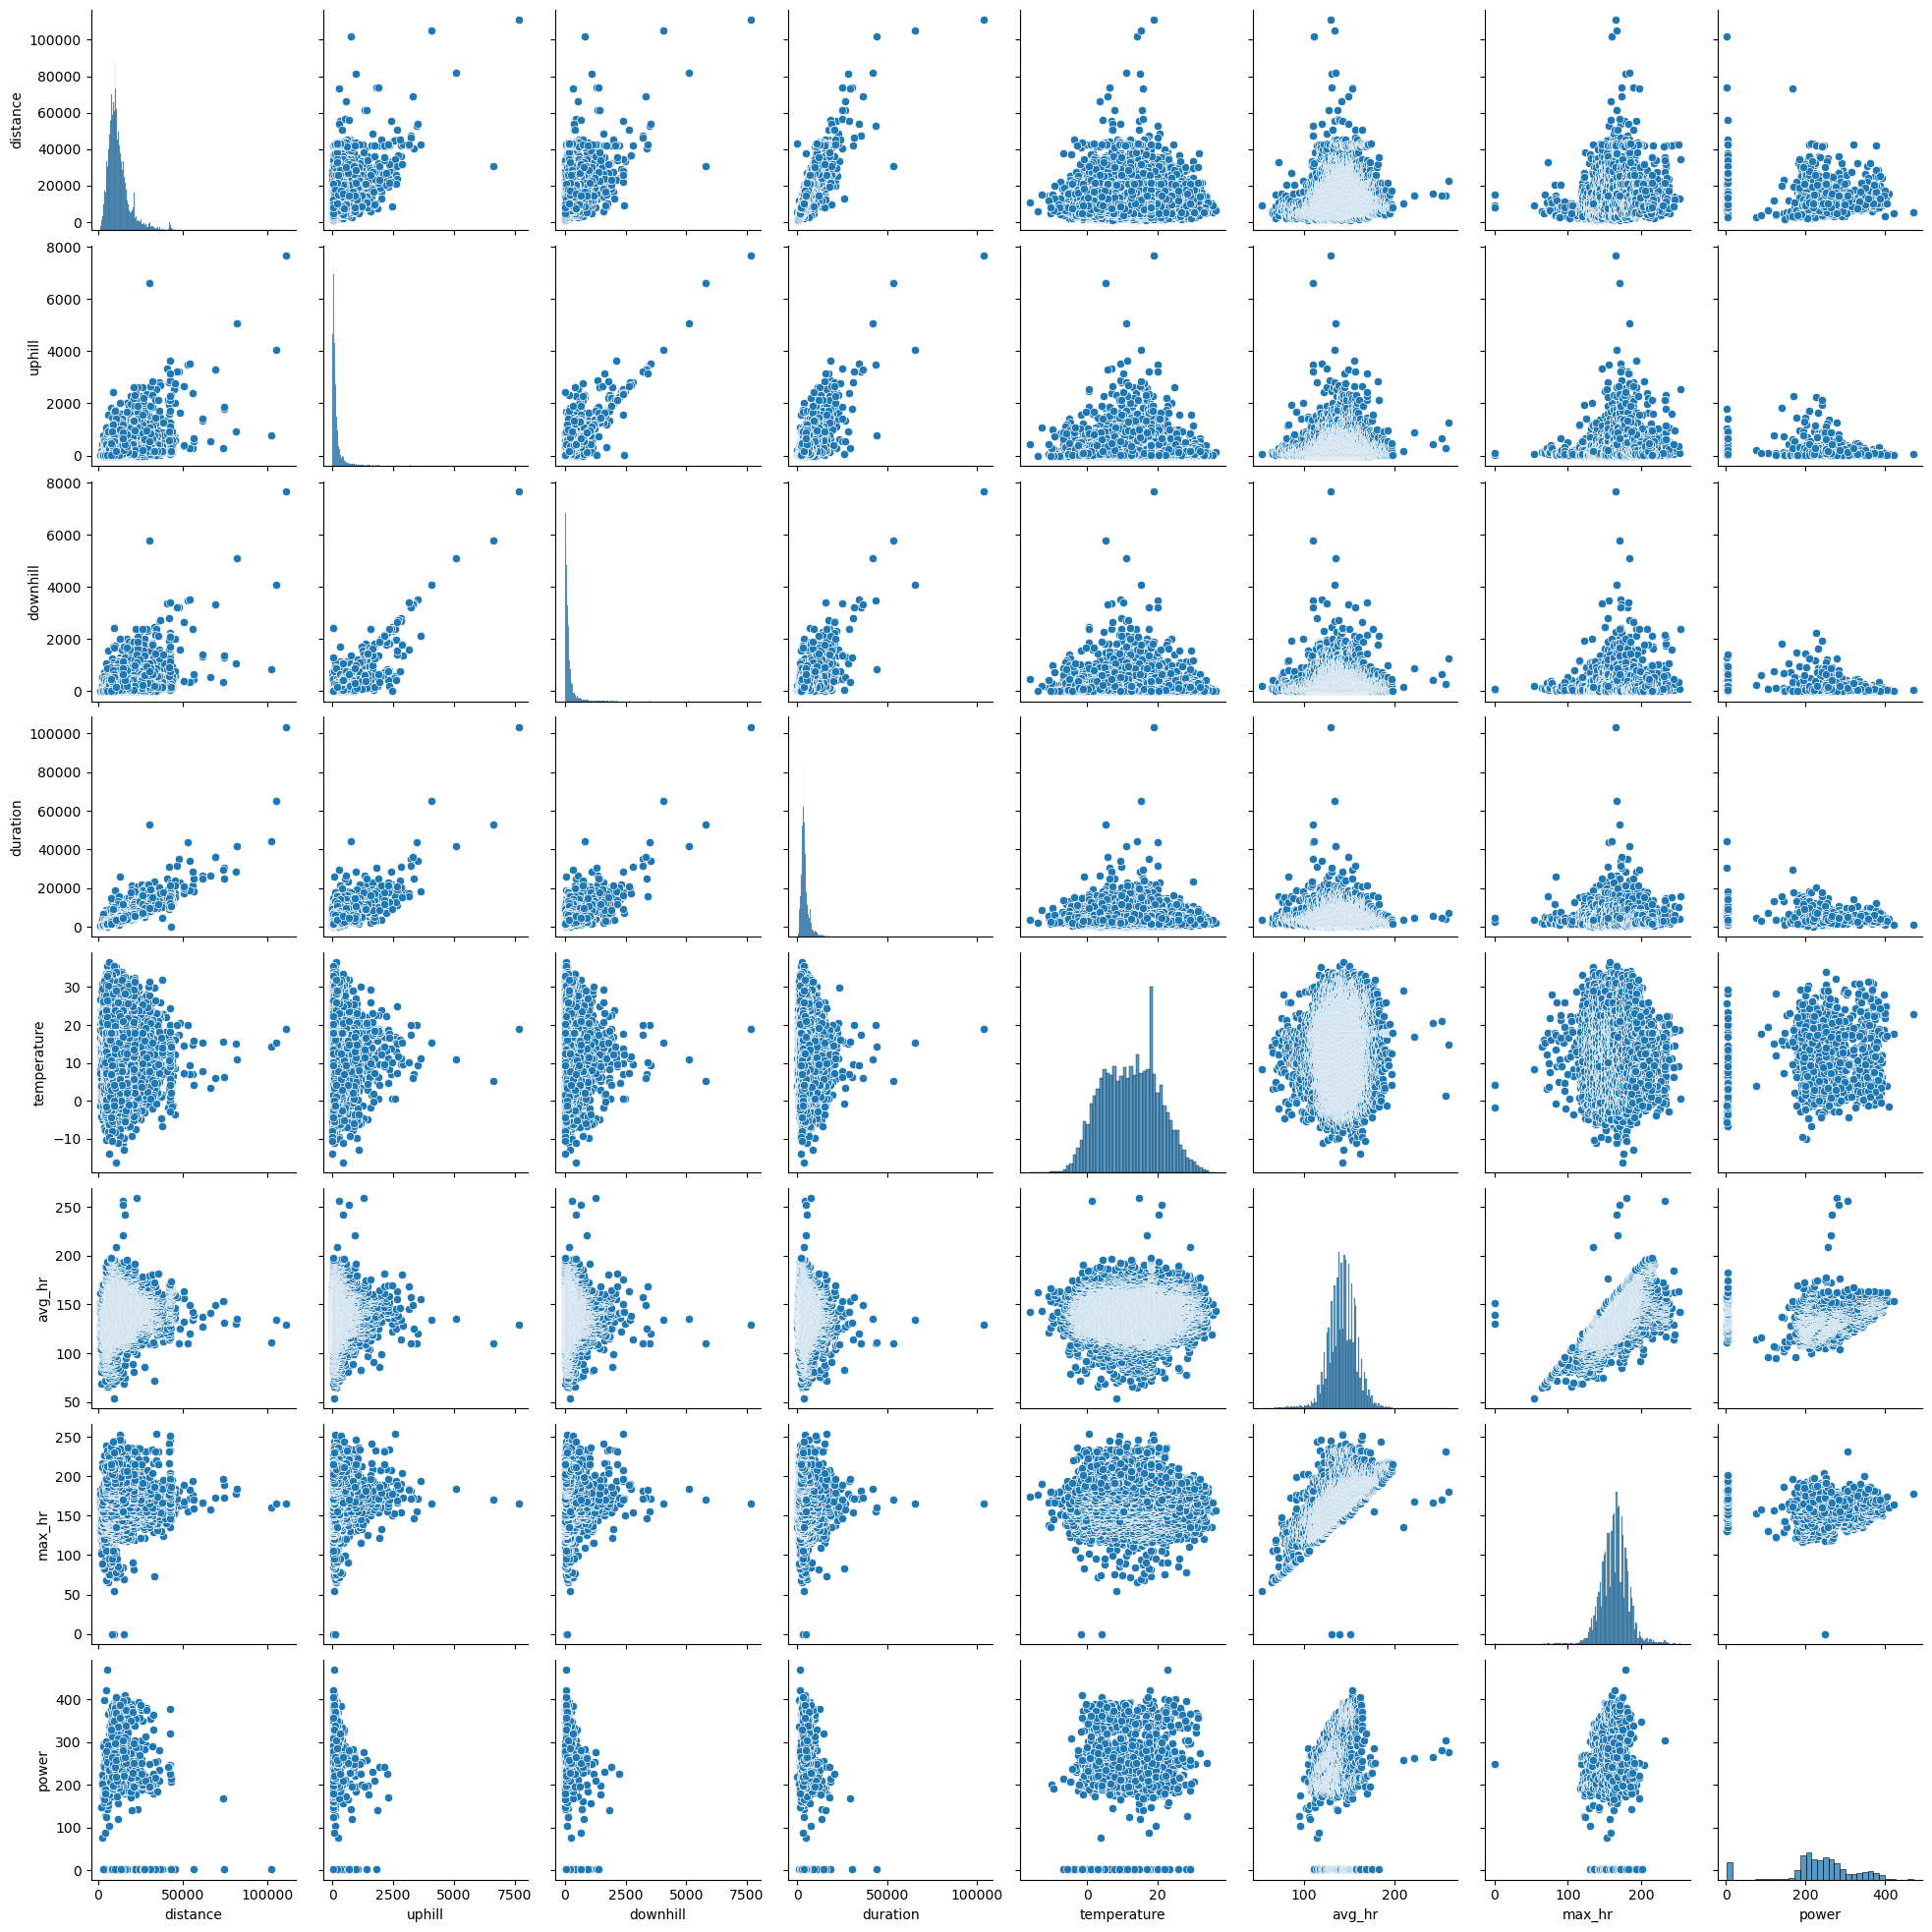

In [6]:
import seaborn as sns

# plot dataset
sns.pairplot(trainings)

### Imputing Missing Values

In [7]:
# power is missing for most runners, try to predict it
# check correlation

corr = trainings.corr()
corr

,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power
distance,1.000000,0.457222,0.461036,0.891787,-0.044299,0.134036,0.174285,-0.117280
uphill,0.457222,1.000000,0.909641,0.645490,0.005097,-0.007066,0.148852,-0.216200
downhill,0.461036,0.909641,1.000000,0.641755,0.000128,-0.029189,0.137031,-0.243336
duration,0.891787,0.645490,0.641755,1.000000,-0.034161,-0.006761,0.100378,-0.196666
temperature,-0.044299,0.005097,0.000128,-0.034161,1.000000,0.002369,0.004691,0.101425
avg_hr,0.134036,-0.007066,-0.029189,-0.006761,0.002369,1.000000,0.749979,0.186912
max_hr,0.174285,0.148852,0.137031,0.100378,0.004691,0.749979,1.000000,0.049741
power,-0.117280,-0.216200,-0.243336,-0.196666,0.101425,0.186912,0.049741,1.000000


<Axes: >

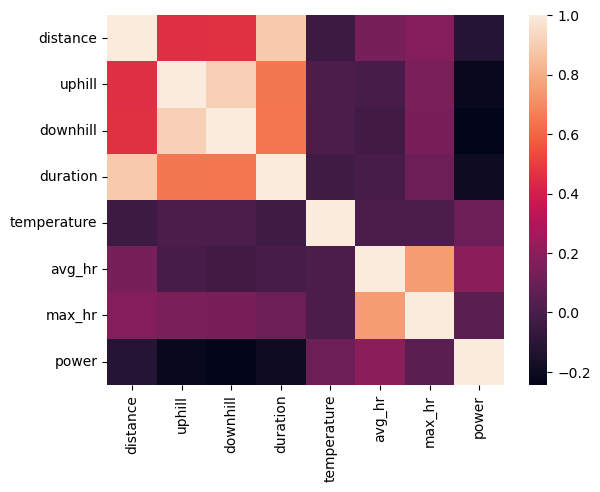

In [8]:
# plot correlation
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
# check correlation with power
corr['power'].sort_values(ascending=False)

power          1.000000
avg_hr         0.186912
temperature    0.101425
max_hr         0.049741
distance      -0.117280
duration      -0.196666
uphill        -0.216200
downhill      -0.243336
Name: power, dtype: float64

**Observations:** The power metric is missing for most persons in the dataset and is not correlated strongly with any other variable. We will ignore this column for now.

### Exam Dataset

In [11]:
# import exam dataset
exam_dataset = pd.read_csv('data/exam_dataset.csv')

In [12]:
exam_dataset.head()

,training_id,user_id,type
0,00c64ed702bf204beb1208224cafd8a14fe51d1d968403...,6718565d7063a43aed889d287bbc1813afbf2119eaa4ca...,NaN
1,02258687393f94100ef3a20c1bbbea3c30a01e79ddde6c...,eda0b1a85c94ba628c44bdefff5cf6941afac025eeee8f...,NaN
2,0230cad3ae88a7d8ac4915366fb9e4e817e1f98bab5205...,db889e243e8ca58f3afe4066c705e2f4f67ce65becf34a...,NaN
3,02cf5e1635db0873d51840170f469dfb2dc731806f05a2...,3f9ab926430606667ec6c7b43dc21f90286d44379bfe74...,NaN
4,05d6ce94c401bfe4b89a2c2b13abce7817e5186cdc9525...,18988f7955b146b015d547d672a86e9223aafc657ceda0...,NaN


In [13]:
# join runs on training_id and user_id
exam_dataset_expanded = exam_dataset.join(trainings.set_index(['training_id', 'user_id']),
                                            on=['training_id', 'user_id'],
                                            how='left',
                                            lsuffix='_exam',
                                            rsuffix='_trainings')

In [14]:
exam_dataset_expanded.head()

,training_id,user_id,type_exam,start_date,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power,type_trainings
0,00c64ed702bf204beb1208224cafd8a14fe51d1d968403...,6718565d7063a43aed889d287bbc1813afbf2119eaa4ca...,NaN,2019-08-11 08:36:23 UTC,8200.0,151.0,142.0,2096.0,21.9,175.0,199,4.0,NaN
1,02258687393f94100ef3a20c1bbbea3c30a01e79ddde6c...,eda0b1a85c94ba628c44bdefff5cf6941afac025eeee8f...,NaN,2019-04-19 09:59:21 UTC,19549.0,35.0,35.0,5753.0,17.9,148.0,168,NaN,NaN
2,0230cad3ae88a7d8ac4915366fb9e4e817e1f98bab5205...,db889e243e8ca58f3afe4066c705e2f4f67ce65becf34a...,NaN,2019-10-27 08:06:16 UTC,21200.0,85.0,84.0,6219.0,12.4,NaN,191,239.0,NaN
3,02cf5e1635db0873d51840170f469dfb2dc731806f05a2...,3f9ab926430606667ec6c7b43dc21f90286d44379bfe74...,NaN,2019-06-16 09:46:12 UTC,5126.0,91.0,79.0,1796.0,17.8,138.0,158,NaN,NaN
4,05d6ce94c401bfe4b89a2c2b13abce7817e5186cdc9525...,18988f7955b146b015d547d672a86e9223aafc657ceda0...,NaN,2019-06-12 04:06:00 UTC,11936.0,35.0,35.0,3782.0,18.0,139.0,162,NaN,NaN


In [16]:
# check unique user IDs in exam dataset
exam_dataset_expanded['user_id'].nunique()

86

In [17]:
# store unique user IDs from exam dataset
unique_user_ids = exam_dataset_expanded['user_id'].unique()

In [20]:
# count number of runs for indiv user in exam dataset
for user_id in unique_user_ids:
    exam_dataset_expanded['num_runs'] = trainings.groupby('user_id')['user_id'].transform('count')

exam_dataset_expanded.head()

,training_id,user_id,type_exam,start_date,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power,type_trainings,num_runs
0,00c64ed702bf204beb1208224cafd8a14fe51d1d968403...,6718565d7063a43aed889d287bbc1813afbf2119eaa4ca...,NaN,2019-08-11 08:36:23 UTC,8200.0,151.0,142.0,2096.0,21.9,175.0,199,4.0,NaN,194
1,02258687393f94100ef3a20c1bbbea3c30a01e79ddde6c...,eda0b1a85c94ba628c44bdefff5cf6941afac025eeee8f...,NaN,2019-04-19 09:59:21 UTC,19549.0,35.0,35.0,5753.0,17.9,148.0,168,NaN,NaN,194
2,0230cad3ae88a7d8ac4915366fb9e4e817e1f98bab5205...,db889e243e8ca58f3afe4066c705e2f4f67ce65becf34a...,NaN,2019-10-27 08:06:16 UTC,21200.0,85.0,84.0,6219.0,12.4,NaN,191,239.0,NaN,194
3,02cf5e1635db0873d51840170f469dfb2dc731806f05a2...,3f9ab926430606667ec6c7b43dc21f90286d44379bfe74...,NaN,2019-06-16 09:46:12 UTC,5126.0,91.0,79.0,1796.0,17.8,138.0,158,NaN,NaN,194
4,05d6ce94c401bfe4b89a2c2b13abce7817e5186cdc9525...,18988f7955b146b015d547d672a86e9223aafc657ceda0...,NaN,2019-06-12 04:06:00 UTC,11936.0,35.0,35.0,3782.0,18.0,139.0,162,NaN,NaN,159


In [22]:
# analyze exam dataset
exam_dataset_expanded.describe()

,type_exam,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power,num_runs
count,0.0,248.000000,250.000000,250.000000,248.000000,250.000000,244.000000,250.000000,30.000000,250.000000
mean,NaN,13824.737903,193.844000,177.052000,4810.225806,13.070800,147.418033,170.984000,231.933333,194.544000
std,NaN,8525.622759,331.215717,285.256429,3292.409480,7.981962,15.488926,21.030666,129.398858,62.864552
min,NaN,2998.000000,0.000000,0.000000,1056.000000,-7.600000,74.000000,75.000000,3.000000,102.000000
25%,NaN,8495.500000,44.000000,42.250000,2950.250000,7.175000,139.000000,159.000000,204.000000,143.000000
50%,NaN,11549.500000,87.500000,88.000000,3807.000000,13.250000,147.000000,171.000000,255.000000,188.000000
75%,NaN,16237.500000,166.750000,165.750000,5352.000000,18.275000,157.000000,182.000000,320.000000,239.000000
max,NaN,44800.000000,2533.000000,2142.000000,19851.000000,33.700000,190.000000,242.000000,396.000000,403.000000


In [23]:
# check missing values
missing_values = exam_dataset_expanded.isnull().sum()

print("Missing values: \n")
missing_values

Missing values: 



training_id         0
user_id             0
type_exam         250
start_date          0
distance            2
uphill              0
downhill            0
duration            2
temperature         0
avg_hr              6
max_hr              0
power             220
type_trainings    250
num_runs            0
dtype: int64

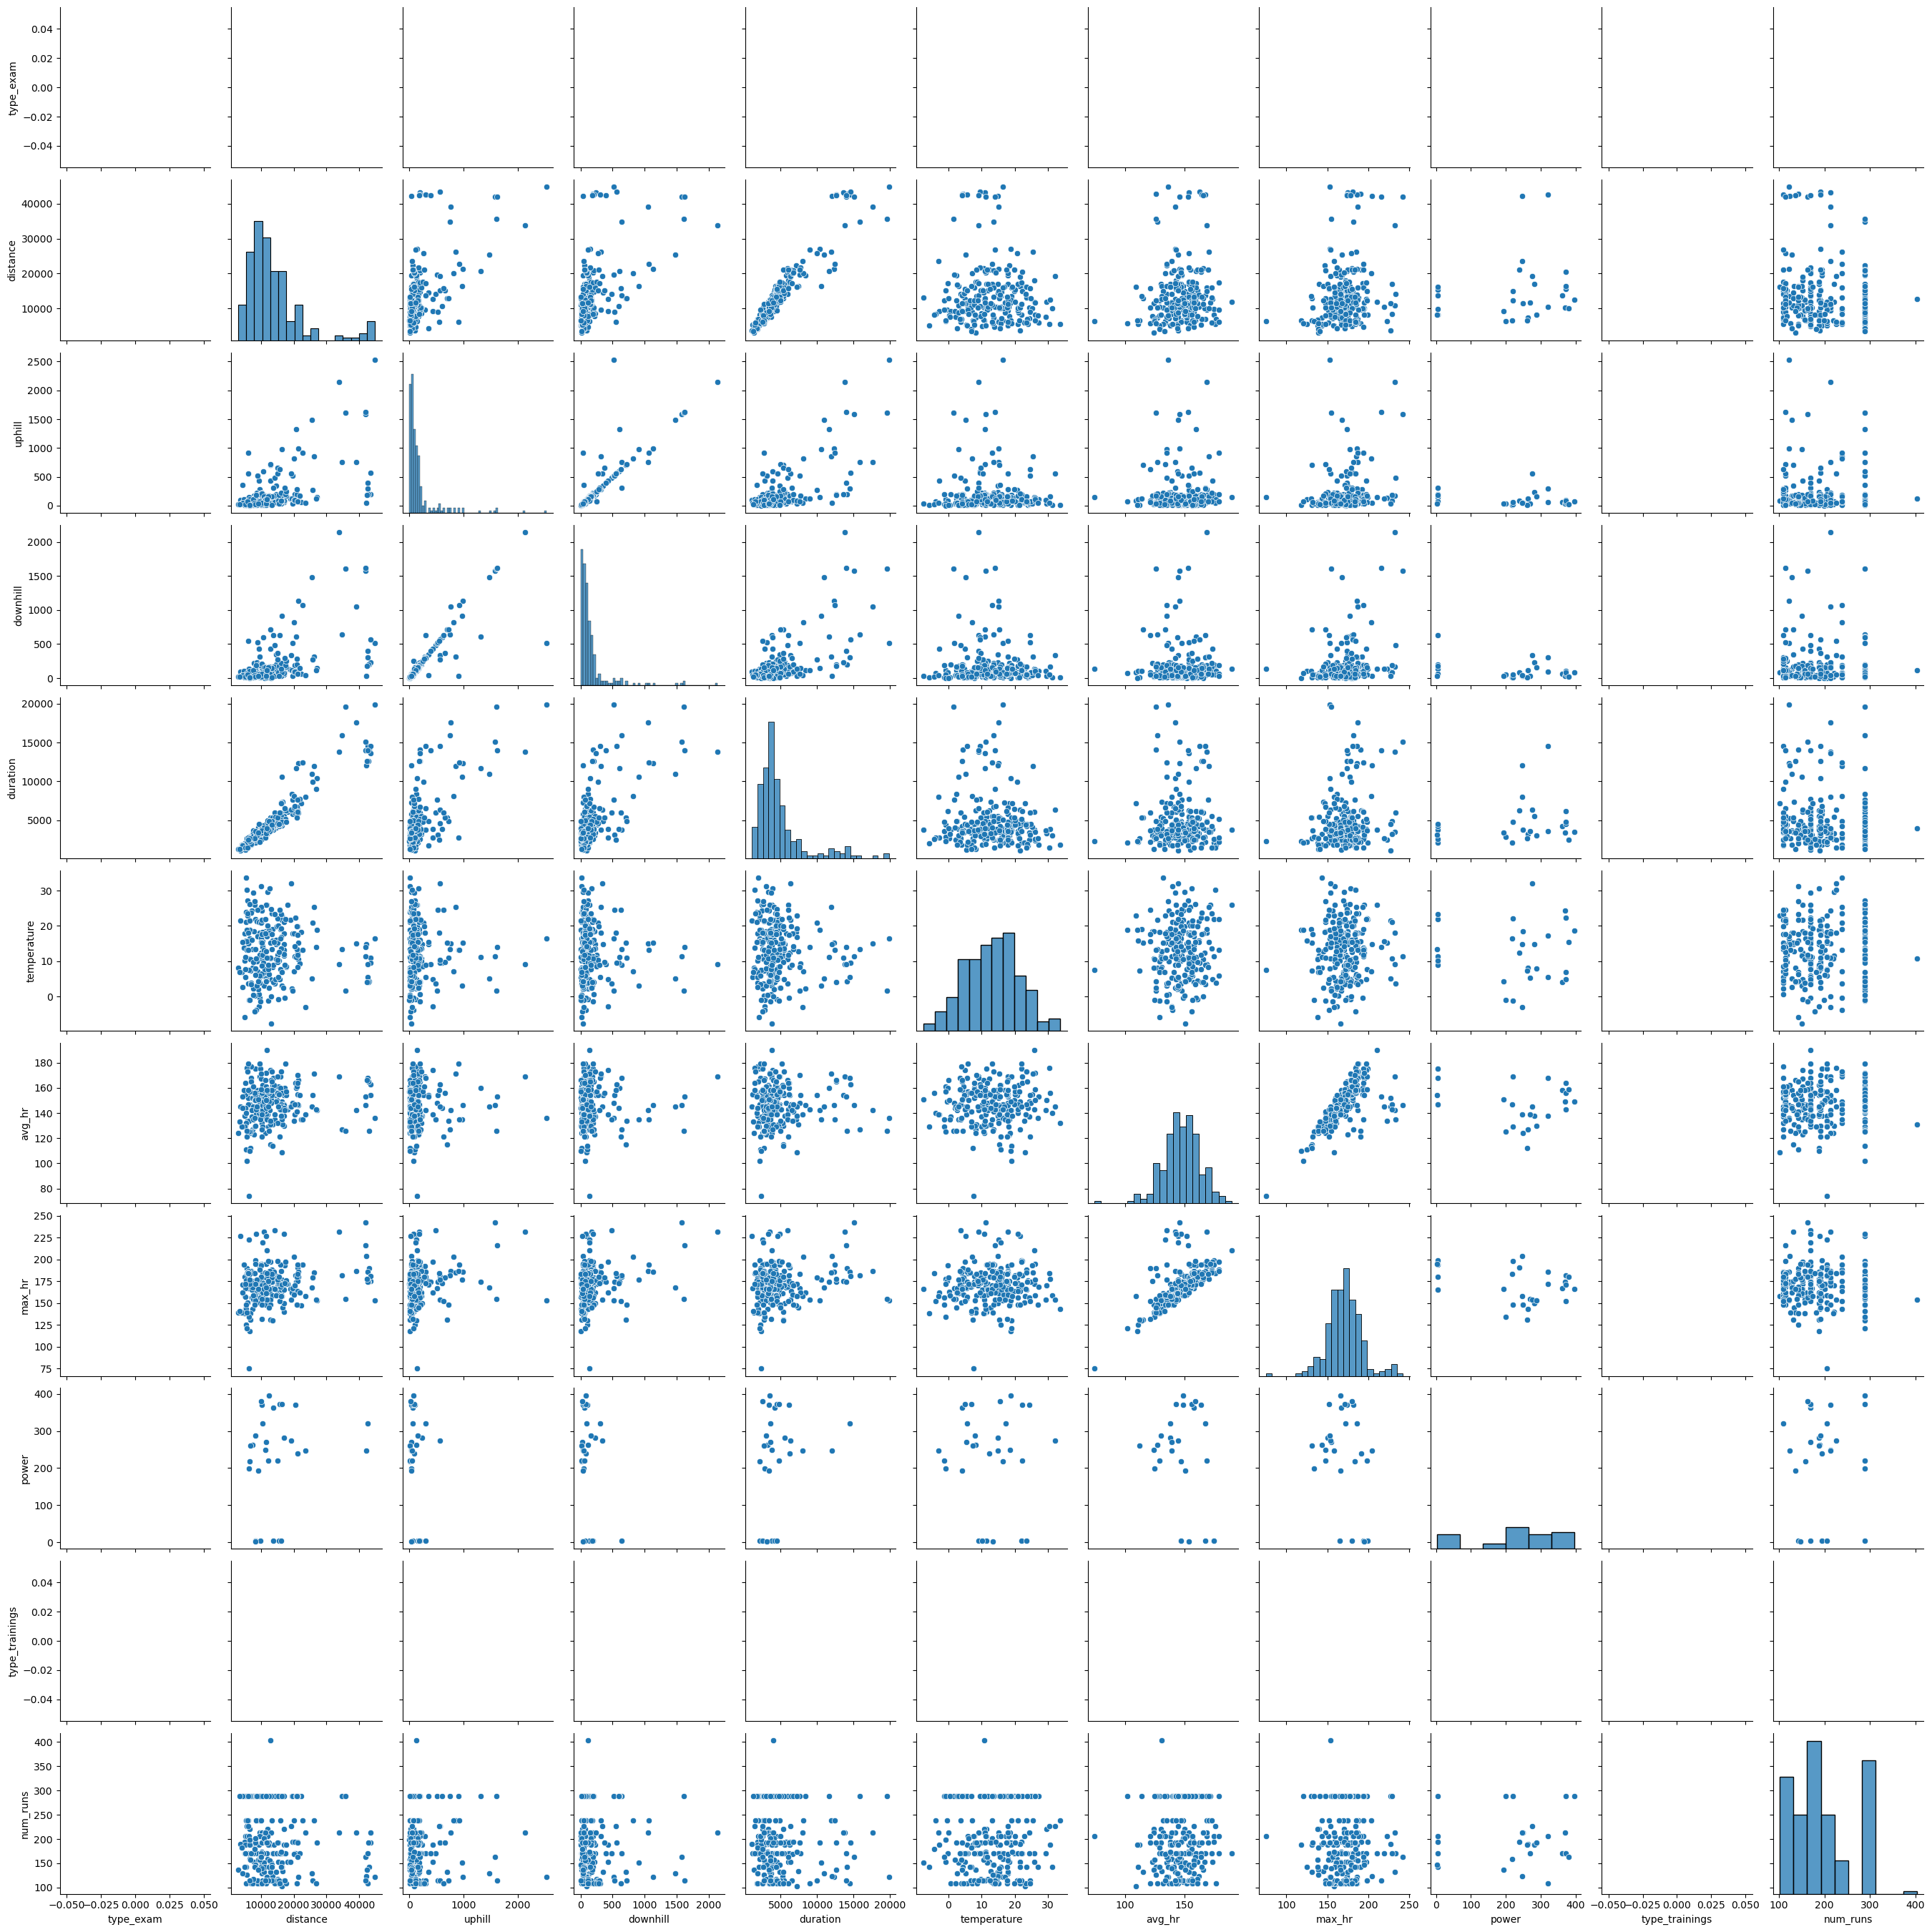

In [24]:
# plot dataset
sns.pairplot(exam_dataset_expanded)

In [25]:
# check correlation
corr = exam_dataset_expanded.corr()
corr

,type_exam,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power,num_runs
type_exam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,NaN,1.000000,0.532866,0.521660,0.939397,-0.066252,0.118582,0.242691,0.175461,-0.092638
uphill,NaN,0.532866,1.000000,0.879625,0.679779,-0.039786,0.013939,0.221384,-0.160673,-0.041779
downhill,NaN,0.521660,0.879625,1.000000,0.648673,-0.070657,-0.003869,0.274364,-0.305689,-0.062809
duration,NaN,0.939397,0.679779,0.648673,1.000000,-0.085256,0.008175,0.191866,0.212322,-0.055390
temperature,NaN,-0.066252,-0.039786,-0.070657,-0.085256,1.000000,0.057430,0.064119,-0.033703,0.030584
avg_hr,NaN,0.118582,0.013939,-0.003869,0.008175,0.057430,1.000000,0.651171,-0.247117,0.014661
max_hr,NaN,0.242691,0.221384,0.274364,0.191866,0.064119,0.651171,1.000000,-0.267014,-0.026780
power,NaN,0.175461,-0.160673,-0.305689,0.212322,-0.033703,-0.247117,-0.267014,1.000000,0.054494
num_runs,NaN,-0.092638,-0.041779,-0.062809,-0.055390,0.030584,0.014661,-0.026780,0.054494,1.000000


<Axes: >

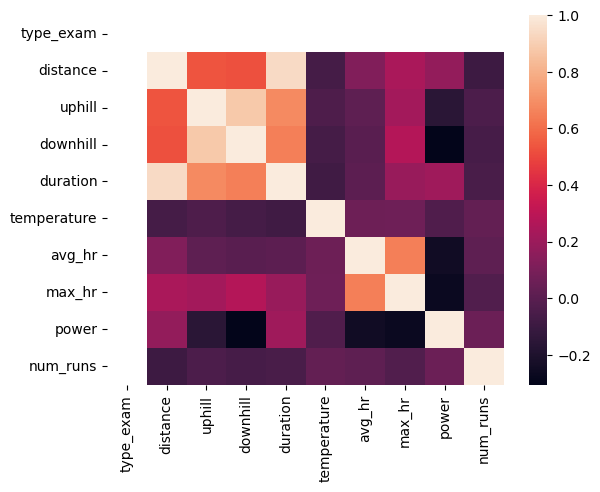

In [26]:
# plot correlation
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [21]:
# analyze number of runs per exam_runner
exam_dataset_expanded['num_runs'].describe()

count    250.000000
mean     194.544000
std       62.864552
min      102.000000
25%      143.000000
50%      188.000000
75%      239.000000
max      403.000000
Name: num_runs, dtype: float64

## Naive Statistical Baseline

In [73]:
# import trainings
trainings = pd.read_csv('data/trainings.csv')

In [74]:
# set NaN values to mean of respective feature
trainings.fillna(trainings.mean(), inplace=True)

/tmp/ipykernel_3951331/3771084841.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  trainings.fillna(trainings.mean(), inplace=True)


In [75]:
# convert user_id and training_id to number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

trainings['user_id'] = le.fit_transform(trainings['user_id'])
trainings['training_id'] = le.fit_transform(trainings['training_id'])

In [76]:
trainings.head()

,user_id,training_id,start_date,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power,type
0,1,11549,2019-12-08 08:59:54 UTC,21100.0,304.0,303.0,5258.0,6.0,142.831739,172,238.508897,RACE
1,1,7589,2019-10-20 09:00:04 UTC,21000.0,210.0,210.0,5086.0,8.5,142.831739,235,238.508897,RACE
2,1,14954,2019-09-08 08:00:19 UTC,21300.0,180.0,180.0,5049.0,9.5,142.831739,175,238.508897,RACE
3,1,11189,2019-10-13 08:00:04 UTC,8000.0,390.0,141.0,2487.0,15.2,142.831739,185,238.508897,RACE
4,6,15050,2019-10-06 08:31:44 UTC,42200.0,127.0,127.0,18303.0,10.5,142.831739,192,238.508897,RACE


In [92]:
# create a train/test split
from sklearn.model_selection import train_test_split

# drop rows that do not have type from dataset
trainings_model = trainings.dropna(subset=['type'])

# drop start_date and power from dataset
trainings_model = trainings_model.drop(['start_date', 'power'], axis=1)

# # split dataset into train and test
# train, test = train_test_split(trainings_model, test_size=0.2, random_state=42)

# initialize dataframes
train = pd.DataFrame()
test = pd.DataFrame()

# select 50 samples for each type as test set and the rest as training
for type in trainings_model['type'].unique():
    type_df = trainings_model[trainings_model['type'] == type]
    test_df = type_df.sample(n=10, random_state=42)
    train_df = type_df.drop(test_df.index)
    train_df = train_df.sample(n=20, random_state=42)
    test = test.append(test_df)
    train = train.append(train_df)


X_train = train.drop(['type'], axis=1)
y_train = train['type']
X_test = test.drop(['type'], axis=1)
y_test = test['type']

/tmp/ipykernel_3951331/618784175.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test_df)
/tmp/ipykernel_3951331/618784175.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_df)
/tmp/ipykernel_3951331/618784175.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test_df)
/tmp/ipykernel_3951331/618784175.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_df)
/tmp/ipykernel_3951331/618784175.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = 

In [93]:
y_test.describe()

count       50
unique       5
top       RACE
freq        10
Name: type, dtype: object

In [57]:
y_train.unique()

array(['RACE', 'INTERVAL', 'LONG JOG', 'STEADY JOG', 'LOW INTENSITY'],
      dtype=object)

### Statistical Baseline 1: Logistic Regression on Average Imputed Data

In [100]:
# run SVM on training set to predict type
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score

# define and fit classifier
LRClassifier = LogisticRegressionCV()
LRClassifier.fit(X_train, y_train)

# predict type on test set
y_pred = LRClassifier.predict(X_test)

# check accuracy
accuracy_score(y_test, y_pred)

/local/home/mamien/miniconda3/envs/science-clf-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/local/home/mamien/miniconda3/envs/science-clf-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

0.3

In [101]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

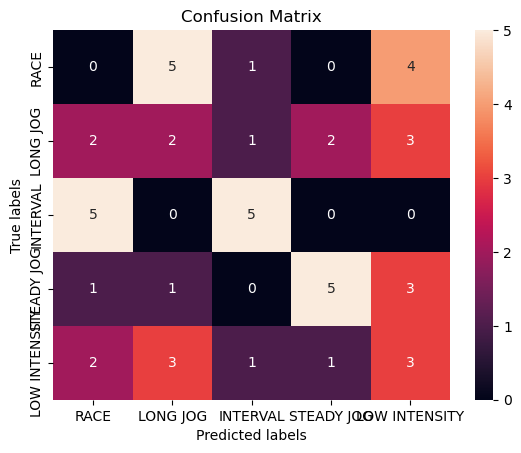

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# map labels to type of runs


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['RACE', 'LONG JOG', 'INTERVAL', 'STEADY JOG', 'LOW INTENSITY'])
ax.yaxis.set_ticklabels(['RACE', 'LONG JOG', 'INTERVAL', 'STEADY JOG', 'LOW INTENSITY']);

### Statistical Baseline 1: Logistic Regression on Iterative RF Imputation

In [91]:
trainings_train = pd.read_csv('data/trainings_train_processed.csv')

In [97]:
# set NaN values to mean of respective feature
trainings_train.fillna(trainings_train.mean(), inplace=True)

/tmp/ipykernel_3951331/484197018.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  trainings_train.fillna(trainings_train.mean(), inplace=True)


In [98]:
# convert user_id and training_id to number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

trainings_train['user_id'] = le.fit_transform(trainings_train['user_id'])
trainings_train['training_id'] = le.fit_transform(trainings_train['training_id'])

In [99]:
trainings_train.head()

,Unnamed: 0,user_id,training_id,start_date,distance,uphill,downhill,duration,temperature,avg_hr,...,duration_NA,avg_hr_NA,power_NA,duration_<10,avg_hr_<30,max_hr_<30,power_<10,avgHR>maxHR,max_hr_>220,avg_hr_>220
0,0,1,11376,2019-12-08 08:59:54 UTC,21100.0,304.0,303.0,5258.0,6.0,158.761365,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,7469,2019-10-20 09:00:04 UTC,21000.0,210.0,210.0,5086.0,8.5,157.158239,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1,14729,2019-09-08 08:00:19 UTC,21300.0,180.0,180.0,5049.0,9.5,161.901564,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,11019,2019-10-13 08:00:04 UTC,8000.0,390.0,141.0,2487.0,15.2,164.775784,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,6,14823,2019-10-06 08:31:44 UTC,42200.0,127.0,127.0,18303.0,10.5,164.625428,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
trainings_train.columns

Index(['Unnamed: 0', 'user_id', 'training_id', 'start_date', 'distance',
       'uphill', 'downhill', 'duration', 'temperature', 'avg_hr', 'max_hr',
       'Type_RACE', 'Type_INTERVAL', 'Type_LONG_JOG', 'Type_STEADY_JOG',
       'Type_LOW_INTENSITY', 'distance_NA', 'uphill_NA', 'downhill_NA',
       'duration_NA', 'avg_hr_NA', 'power_NA', 'duration_<10', 'avg_hr_<30',
       'max_hr_<30', 'power_<10', 'avgHR>maxHR', 'max_hr_>220', 'avg_hr_>220'],
      dtype='object')

In [106]:
# add column to df for type of run
# Types: Type_RACE', 'Type_INTERVAL', 'Type_LONG_JOG', 'Type_STEADY_JOG', 'Type_LOW_INTENSITY',

trainings_train['type'] = np.nan
trainings_train.loc[trainings_train['Type_RACE'] == 1, "type"] = "RACE"
trainings_train.loc[trainings_train['Type_INTERVAL'] == 1, "type"] = "INTERVAL"
trainings_train.loc[trainings_train['Type_LONG_JOG'] == 1, "type"] = "LONG_JOG"
trainings_train.loc[trainings_train['Type_STEADY_JOG'] == 1, "type"] = "STEADY_JOG"
trainings_train.loc[trainings_train['Type_LOW_INTENSITY'] == 1, "type"] = "LOW_INTENSITY"

In [109]:
trainings_train.head()

,Unnamed: 0,user_id,training_id,start_date,distance,uphill,downhill,duration,temperature,avg_hr,...,avg_hr_NA,power_NA,duration_<10,avg_hr_<30,max_hr_<30,power_<10,avgHR>maxHR,max_hr_>220,avg_hr_>220,type
0,0,1,11376,2019-12-08 08:59:54 UTC,21100.0,304.0,303.0,5258.0,6.0,158.761365,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RACE
1,1,1,7469,2019-10-20 09:00:04 UTC,21000.0,210.0,210.0,5086.0,8.5,157.158239,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,RACE
2,2,1,14729,2019-09-08 08:00:19 UTC,21300.0,180.0,180.0,5049.0,9.5,161.901564,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RACE
3,3,1,11019,2019-10-13 08:00:04 UTC,8000.0,390.0,141.0,2487.0,15.2,164.775784,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RACE
4,4,6,14823,2019-10-06 08:31:44 UTC,42200.0,127.0,127.0,18303.0,10.5,164.625428,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RACE


In [114]:
# create a train/test split
from sklearn.model_selection import train_test_split

# drop rows that do not have type from dataset
trainings_model = trainings_train.dropna(subset=['type'])

# drop start_date and power from dataset
trainings_model = trainings_model.drop(['start_date'], axis=1)

# # split dataset into train and test
# train, test = train_test_split(trainings_model, test_size=0.2, random_state=42)

# initialize dataframes
train = pd.DataFrame()
test = pd.DataFrame()

# select 50 samples for each type as test set and the rest as training
for type in trainings_model['type'].unique():
    type_df = trainings_model[trainings_model['type'] == type]
    test_df = type_df.sample(n=10, random_state=42)
    train_df = type_df.drop(test_df.index)
    train_df = train_df.sample(n=20, random_state=42)
    test = test.append(test_df)
    train = train.append(train_df)


X_train = train.drop(['type'], axis=1)
y_train = train['type']
X_test = test.drop(['type'], axis=1)
y_test = test['type']

/tmp/ipykernel_3951331/1197100862.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test_df)
/tmp/ipykernel_3951331/1197100862.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_df)
/tmp/ipykernel_3951331/1197100862.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test_df)
/tmp/ipykernel_3951331/1197100862.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_df)
/tmp/ipykernel_3951331/1197100862.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  te

In [118]:
# run SVM on training set to predict type
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score

# define and fit classifier
LRClassifier = LogisticRegressionCV(cv=5)
LRClassifier.fit(X_train, y_train)

# predict type on test set
y_pred = LRClassifier.predict(X_test)

# check accuracy
accuracy_score(y_test, y_pred)

/local/home/mamien/miniconda3/envs/science-clf-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/local/home/mamien/miniconda3/envs/science-clf-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

0.38

In [119]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

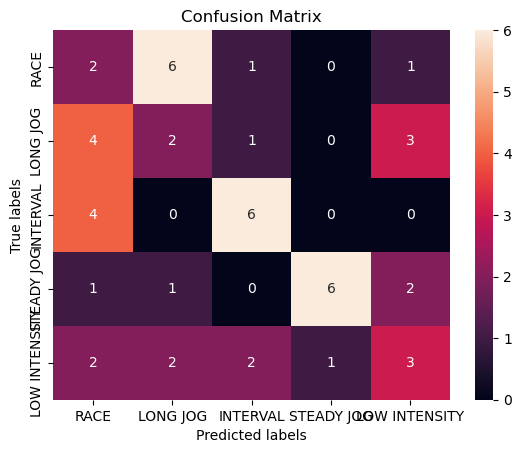

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# map labels to type of runs


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['RACE', 'LONG JOG', 'INTERVAL', 'STEADY JOG', 'LOW INTENSITY'])
ax.yaxis.set_ticklabels(['RACE', 'LONG JOG', 'INTERVAL', 'STEADY JOG', 'LOW INTENSITY']);

**Observations:** The iterative RF imputation improves the performance of the logistic regression model. We will use this imputation method for the rest of the analysis.

## Feature Engineering

In [6]:
trainings_train = pd.read_csv('data/trainings_train_processed.csv')

In [7]:
trainings_train.head()

,Unnamed: 0,user_id,training_id,start_date,distance,uphill,downhill,duration,temperature,avg_hr,...,duration_NA,avg_hr_NA,power_NA,duration_<10,avg_hr_<30,max_hr_<30,power_<10,avgHR>maxHR,max_hr_>220,avg_hr_>220
0,0,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,b402af469b4988e3032cd38bdd857223e7fe8d319d4459...,2019-12-08 08:59:54 UTC,21100.0,304.0,303.0,5258.0,6.0,158.761365,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,76b9f9be04b79a9a3329a4c925c74eef0ccee6f492caa4...,2019-10-20 09:00:04 UTC,21000.0,210.0,210.0,5086.0,8.5,157.158239,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,e9ac936eb22b0994df03d81b6ebc1eabae05ef0d18dc04...,2019-09-08 08:00:19 UTC,21300.0,180.0,180.0,5049.0,9.5,161.901564,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,aec2d658c0098a559716ad49efb6e7731b6b5a7cfde3e6...,2019-10-13 08:00:04 UTC,8000.0,390.0,141.0,2487.0,15.2,164.775784,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,101fe9a1cf14890d1d02bb95e725cbb64156a8d13a876f...,eb34a62d420b0a5e1e5ccc4e8dd75b3a4bdca13a07d2ea...,2019-10-06 08:31:44 UTC,42200.0,127.0,127.0,18303.0,10.5,164.625428,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
trainings_train.columns

Index(['Unnamed: 0', 'user_id', 'training_id', 'start_date', 'distance',
       'uphill', 'downhill', 'duration', 'temperature', 'avg_hr', 'max_hr',
       'Type_RACE', 'Type_INTERVAL', 'Type_LONG_JOG', 'Type_STEADY_JOG',
       'Type_LOW_INTENSITY', 'distance_NA', 'uphill_NA', 'downhill_NA',
       'duration_NA', 'avg_hr_NA', 'power_NA', 'duration_<10', 'avg_hr_<30',
       'max_hr_<30', 'power_<10', 'avgHR>maxHR', 'max_hr_>220', 'avg_hr_>220'],
      dtype='object')

In [9]:
trainings_train.describe()

,Unnamed: 0,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,Type_RACE,Type_INTERVAL,...,duration_NA,avg_hr_NA,power_NA,duration_<10,avg_hr_<30,max_hr_<30,power_<10,avgHR>maxHR,max_hr_>220,avg_hr_>220
count,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000,...,16102.000000,16102.000000,16102.000000,16102.000000,16102.0,16102.000000,16102.000000,16102.000000,16102.000000,16102.0
mean,8155.149795,11851.622826,155.256637,149.861101,4258.088395,12.368911,142.756547,164.303721,0.027015,0.069991,...,0.000124,0.002360,0.914607,0.000124,0.0,0.000186,0.005900,0.000435,0.006459,0.0
std,4715.238098,6566.509090,260.996277,236.791472,2747.943222,8.032691,15.013067,17.518445,0.162133,0.255140,...,0.011145,0.048524,0.279474,0.011145,0.0,0.013649,0.076586,0.020846,0.080109,0.0
min,0.000000,1237.000000,0.000000,0.000000,451.000000,-16.300000,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,4070.250000,7880.250000,40.000000,40.000000,2790.250000,6.000000,133.000000,153.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,8145.500000,10340.000000,85.000000,86.000000,3628.000000,12.500000,143.000000,165.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,12230.750000,14174.500000,167.000000,168.000000,4845.750000,18.000000,153.000000,175.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
max,16351.000000,111000.000000,7673.000000,7674.000000,103512.000000,36.500000,198.000000,254.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [10]:
# analyze the start_date column
start_date = trainings_train['start_date']

start_date.describe()

count                       16102
unique                      16053
top       2019-06-19 17:00:02 UTC
freq                            3
Name: start_date, dtype: object

In [11]:
# convert start_date to datetime
start_date = pd.to_datetime(start_date)

<Axes: >

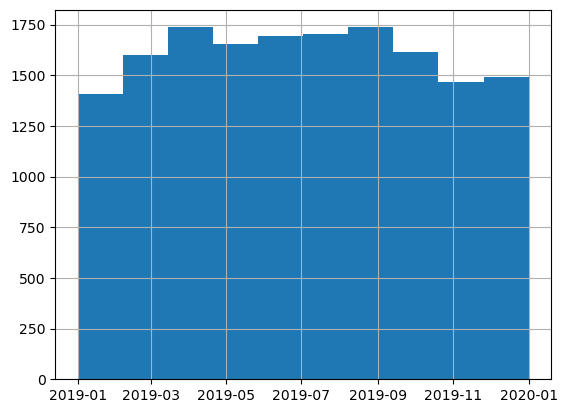

In [12]:
# distribution of runs according to date
start_date.hist()

<Axes: >

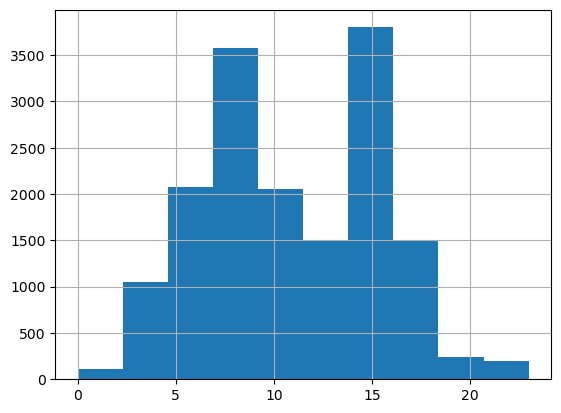

In [13]:
# analyze the time of day of runs
start_time_of_day = start_date.dt.hour

# distribution of runs according to time
start_time_of_day.hist()

In [14]:
start_time_of_day.describe()

count    16102.000000
mean        10.972364
std          4.554910
min          0.000000
25%          7.000000
50%         11.000000
75%         15.000000
max         23.000000
Name: start_date, dtype: float64

In [15]:
# divide the day into 5 different segments
segments = ['early_morning', 'late_morning', 'early_afternoon', 'late_afternoon', 'evening']

# add column to df converting dtype of start date to hour
trainings_train['start_time_of_day'] = start_time_of_day

In [17]:
# add column to df for segment of day
import numpy as np
trainings_train['start_segment_of_day'] = np.nan
trainings_train.loc[trainings_train['start_time_of_day'] < 9, "start_segment_of_day"] = "early_morning"
trainings_train.loc[(trainings_train['start_time_of_day'] >= 9) & (trainings_train['start_time_of_day'] < 12), "start_segment_of_day"] = "late_morning"
trainings_train.loc[(trainings_train['start_time_of_day'] >= 12) & (trainings_train['start_time_of_day'] < 15), "start_segment_of_day"] = "early_afternoon"
trainings_train.loc[(trainings_train['start_time_of_day'] >= 15) & (trainings_train['start_time_of_day'] < 18), "start_segment_of_day"] = "late_afternoon"
trainings_train.loc[trainings_train['start_time_of_day'] >= 18, "start_segment_of_day"] = "evening"

In [18]:
trainings_train['type'] = np.nan
trainings_train.loc[trainings_train['Type_RACE'] == 1, "type"] = "RACE"
trainings_train.loc[trainings_train['Type_INTERVAL'] == 1, "type"] = "INTERVAL"
trainings_train.loc[trainings_train['Type_LONG_JOG'] == 1, "type"] = "LONG_JOG"
trainings_train.loc[trainings_train['Type_STEADY_JOG'] == 1, "type"] = "STEADY_JOG"
trainings_train.loc[trainings_train['Type_LOW_INTENSITY'] == 1, "type"] = "LOW_INTENSITY"

In [19]:
# save as csv
trainings_train.to_csv('data/trainings_train_processed_segments.csv', index=False)

## Parallelize Geospatial Data

In [90]:
# load all files in big_data folder to one dataframe
import glob
import pandas as pd

path = r'big_data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

big_data = pd.concat(li, axis=0, ignore_index=True)

big_data/6e09da335576eae795fc3e01435613510ca1d5ecaaea29324acbefaa7ef66c82_run_logs.csv
big_data/6152ae42734b3af69a9cbf87c57b97266e9b701ece77201c820494d8016f8d81_run_logs.csv
big_data/cdf16f3eb80dcb59e3169cb7e138695dc26baee36df5258c0dc04657c190368a_run_logs.csv
big_data/db889e243e8ca58f3afe4066c705e2f4f67ce65becf34a7fcf0ed2a50418ed69_run_logs.csv
big_data/7fe4e3884641d8581525349e2085f1cc0b1e0f0deddc1477e9f6c25a864721b9_run_logs.csv
big_data/a0b165b76071f3b6ee5881e541aaa86e63aa9e33372fab14bec0f4a809acbfa6_run_logs.csv
big_data/124efbb5b266af8df5cdceb687a9a09cf946074d8201b1a20d27e1fd2484d0a1_run_logs.csv
big_data/9a2756ee44e8181ec312eda5de2e8629df1f7800c879735e03941ee838b71775_run_logs.csv
big_data/945a141cb05fa2d731807576c664864ead573e3a4143ddd8eefe93a7781ad44f_run_logs(1).csv
big_data/46464b2ca1bdf8ab6cc6d45ab8374d8bd96a96f51d87d017d0ecff115b53f33b_run_logs.csv
big_data/315ddfdbf714251b57a17a58bfcd13e1ce1ea54773c5ae36d3d7bc40a8bfd161_run_logs.csv
big_data/4066f060269c78cfcac71c7ad7db3c5

In [105]:
# load trainings_train_processed.csv
trainings_train = pd.read_csv('data/trainings_train_processed.csv')

In [106]:
# join big_data and trainings_train on user_id
big_data_merged = big_data.join(trainings_train.set_index('user_id'), on='user_id')

ValueError: columns overlap but no suffix specified: Index(['training_id'], dtype='object')

In [104]:
# add meteo data to big_data
from datetime import datetime
import matplotlib.pyplot as plt
from sympy import stationary_points
from meteostat import Point, Daily, Hourly

# for each row in big_data, get the meteo data for the location and date
for index, row in big_data.iterrows():
    # get the date and time of the run
    # Convert string to datetime object
    utc_datetime = datetime.strptime(row['time'], '%Y-%m-%d %H:%M:%S %Z')

    # Get the time in hours, minutes, and seconds
    utc_time = utc_datetime.time()

    # Get the time in hours
    utc_hour = utc_datetime.hour

    # start_date =  utc_datetime.date()

    # # get the date with time 23:59:59
    # end_date = datetime.combine(start_date, datetime.max.time())

    # print(start_date)
    # print(end_date)
    # Set time period
    start_date = datetime(2021, 1, 1)
    end_date = datetime(2021, 1, 31)


    # get location
    location = Point(row['lat'], row['lng'], row['ele'])
    # get meteo data

    # Get daily weather data
    daily_data = Daily(location, start_date, end_date)
    daily_data = daily_data.fetch()

    # Get hourly weather data
    hourly_data = Hourly(location, start_date, end_date)
    hourly_data = hourly_data.fetch()
    
    data = Hourly(location, start_date, end_date)
    data = data.fetch()
    
    # get data for the hour of the run
    data_run = data[data.index.hour == utc_hour]

    # add meteo data to row
    big_data.loc[index, 'temp'] = data_run['temp'].mean()
    big_data.loc[index, 'dwpt'] = data_run['dwpt'].mean()
    big_data.loc[index, 'rhum'] = data_run['rhum'].mean()
    big_data.loc[index, 'prcp'] = data_run['prcp'].mean()

# save big_data to csv
big_data.to_csv('big_data_expanded.csv', index=False)

AttributeError: 'Index' object has no attribute 'hour'

In [78]:
print(all_files[10])

big_data/315ddfdbf714251b57a17a58bfcd13e1ce1ea54773c5ae36d3d7bc40a8bfd161_run_logs.csv


In [88]:
f = pd.read_csv(all_files[55])

f.head()

,user_id,training_id,time,lat,lng,hr,ele
0,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,001efc68e1557d99b4dce0ac1d57e702de1ac14c41304b...,2019-11-08 06:51:04 UTC,48.675577,7.928246,150,127.0
1,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,001efc68e1557d99b4dce0ac1d57e702de1ac14c41304b...,2019-11-08 08:01:13 UTC,48.671973,7.935120,162,128.0
2,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,001efc68e1557d99b4dce0ac1d57e702de1ac14c41304b...,2019-11-08 07:13:27 UTC,48.658773,7.886423,157,133.0
3,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,001efc68e1557d99b4dce0ac1d57e702de1ac14c41304b...,2019-11-08 07:29:48 UTC,48.653443,7.872785,160,125.0
4,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,001efc68e1557d99b4dce0ac1d57e702de1ac14c41304b...,2019-11-08 06:54:06 UTC,48.679288,7.925834,149,130.0


In [89]:
f['time'] = pd.to_datetime(df['time'])
f.sort_values(by='time', inplace=True)

f.head()

,user_id,training_id,time,lat,lng,hr,ele
41168,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,805d4fd8b8d0706e35a8aa2f6136f4dd892e363cec8283...,2019-01-01 13:15:57+00:00,48.648314,7.861719,151,133.0
55463,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,014101e5e83747949b698115692fdc7ff8c2c68d88fcdd...,2019-01-01 13:16:04+00:00,48.713283,8.041143,148,127.0
38221,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,16f31ff2b771cbc991da01ab8fa3da55133cc66496905e...,2019-01-01 13:16:11+00:00,48.706625,8.047215,149,126.0
94477,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,0d05f0403f65b31bcb9be6001011500def02357942b1d3...,2019-01-01 13:16:18+00:00,48.704167,8.014103,146,126.0
103187,6493315a566fd7e832de2e6090a029b3167a94c7e963b2...,18839bfa2f63a2e339b7bd0ff78599fba0076c2f43e26d...,2019-01-01 13:16:23+00:00,48.718797,7.999194,159,123.0


In [33]:
import math

from geopy import distance

p1 = (43.668613, 40.258916, 0.976)

p2 = (43.658852, 40.250839, 1.475)

flat_distance = distance.distance(p1[:2], p2[:2]).km

print(flat_distance)

euclidian_distance = math.sqrt(flat_distance**2 + (p2[2] - p1[2])**2)

print(euclidian_distance)


1.2651335259542789
1.3599867052635133


In [79]:
from geopy import distance
import pandas as pd
import math

def geo_distance(pt1, pt2):
    flat_distance = distance.distance(pt1[:2], pt2[:2]).km
    euclidian_distance = math.sqrt(flat_distance**2 + (pt2[2] - pt1[2])**2)
    return euclidian_distance 


def relative_speed_progression(filename):
    # read in data
    df = pd.read_csv(filename)

    # calculate time difference between consecutive points and sort by time
    df['time'] = pd.to_datetime(df['time'])
    df.sort_values(by='time', inplace=True)
    df['time_diff'] = df['time'].diff().dt.total_seconds()
    df['time_diff'].fillna(0, inplace=True)
    times = df['time_diff'].tolist()
    

    # calculate distance between consecutive points
    distances = []
    for i in range(len(df)-1):
        lat1, lon1, ele1 = df.loc[i, 'lat'], df.loc[i, 'lng'], df.loc[i, 'ele']
        pt1 = lat1, lon1, ele1
        lat2, lon2, ele2 = df.loc[i+1, 'lat'], df.loc[i+1, 'lng'], df.loc[i+1, 'ele']
        pt2 = lat2, lon2, ele2
        dist = geo_distance(pt1, pt2)
        distances.append(dist)

    # calculate speed for each segment
    speeds = []
    for dist, time in zip(distances, times):
        if time == 0:
            speed = 0
        else:
            speed = dist / time
        speeds.append(speed)

    # calculate average speed for each kilometer
    avg_speeds = []
    dist = 0
    dist_per_km = 1000  # in meters
    time = 0
    for i, speed in enumerate(speeds):
        dist += distances[i]
        time += times[i]
        if dist >= dist_per_km:
            avg_speed = dist / time
            avg_speeds.append(avg_speed)
            dist -= dist_per_km
            time = 0

    return filename, avg_speeds
    # return distances
    # return times

In [85]:
dic = dict()
for file in all_files:
    file, speeds = relative_speed_progression(all_files)
    dic[file] = speeds

# to csv
df = pd.DataFrame.from_dict(dic, orient='index')
df.to_csv('relative_speed_progression.csv')

In [87]:
r

[10.94964640183138,
 14.096774475462212,
 39.09501033845644,
 186.17700366057872,
 45.76510224296515,
 213.93850056164123,
 1104.6599879382206,
 126.75708908963779,
 57.67128048409526,
 211.0868586494671,
 247.88611179051105,
 45.960866705170766,
 296.7595428138766,
 64.17247635646049,
 43.52103678006322,
 22.940971427137256,
 522.1394882313353,
 17.12363999392919,
 34.97562497074202,
 36.18864137923765,
 239.05609630711697,
 11.246272115670338,
 222.81817315866283,
 143.47651209291223,
 22.1824084117068,
 184.0459899196604,
 20.282296275531948,
 207.8299458294478,
 22.251082491128763,
 14.000004170351321,
 133.08425028938564,
 19.09602939296901,
 35.831363806743994,
 21.890623483158397,
 15.110412843462019,
 202.80272891130335,
 47.59090592149247,
 239.012092055137,
 99.2442605961326,
 84.83040509984802,
 103.00812370429767,
 29.485294985118106,
 10.42528665903592,
 32.42925949424175,
 24.003842144792976,
 389.4216919845416,
 46.64915337223618,
 73.44247077467311,
 51.06181912214437,


In [38]:
# create a mapping for each file for user_id and training_id to numerical values
for i, file in enumerate(all_files):
    f = pd.read_csv(file, index_col=None, header=0)
    user_id = f['user_id'].unique()
    training_ids = f['training_id'].values
    user_id_mapping = dict(zip(user_id, range(len(user_id))))
    training_id_mapping = dict(zip(training_ids, range(len(training_ids))))
    f['user_id'] = f['user_id'].map(lambda x: user_id_mapping[x])
    f['training_id'] = f['training_id'].map(lambda x: training_id_mapping[x])
    f.to_csv('big_data_mapped/' + str(i) + '.csv')
    # save mapping to csv
    user_id_mapping_df = pd.DataFrame.from_dict(user_id_mapping, orient='index')
    training_id_mapping_df = pd.DataFrame.from_dict(training_id_mapping, orient='index')
    user_id_mapping_df.to_csv('big_data_mapped/user_id_mapping_' + str(i) + '.csv')
    training_id_mapping_df.to_csv('big_data_mapped/training_id_mapping_' + str(i) + '.csv')

In [43]:
file = pd.read_csv(all_files[0], index_col=None, header=0)
file.dtypes

Unnamed: 0       int64
user_id          int64
training_id      int64
time            object
lat            float64
lng            float64
hr               int64
ele            float64
dtype: object

In [49]:
file.head()

,Unnamed: 0,user_id,training_id,time,lat,lng,hr,ele
0,0,0,114035,2019-06-05 16:54:06 UTC,48.117815,9.732538,140,623.0
1,1,0,114035,2019-06-05 16:45:47 UTC,48.130082,9.737309,133,608.0
2,2,0,114246,2019-02-10 11:58:15 UTC,48.268623,9.727332,134,496.0
3,3,0,114246,2019-02-10 12:00:59 UTC,48.273255,9.725249,135,493.0
4,4,0,114250,2019-08-15 16:24:24 UTC,39.338390,-106.286283,117,3273.0


In [ ]:
df_run_logs = file

In [ ]:
from multiprocessing import Pool, current_process, Queue
import pandas as pd
import numpy as np
import geopandas as gpd
import torch

NUM_GPUS = 4
PROC_PER_GPU = 2

queue = Queue()

def foo(filename):
    gpu_id = queue.get()
    try:
        # run processing on GPU <gpu_id>
        ident = current_process().ident
        print('{}: starting process on GPU {}'.format(ident, gpu_id))
        user_dic = dict()
        
        # load data
        print(filename)
        df_run_logs = pd.read_csv(filename, index_col=None, header=0) 

        # drop column unnamed
        df_run_logs = df_run_logs.drop(columns=['Unnamed: 0'])       

        # convert time column to datetime
        df_run_logs['time'] = pd.to_datetime(df_run_logs['time'])

        # convert to unix timestamp
        df_run_logs['time'] = df_run_logs['time'].astype('int64')//1e9

        # convert to dtype int or float
        df_run_logs = df_run_logs.astype({'user_id': int, 'training_id': int, 'lat': float, 'lng': float, 'ele': int, 'time': float, 'hr': int})

        # convert to numpy array
        df_run_logs = df_run_logs.to_numpy()

        # convert to tensor
        df_run_logs = torch.from_numpy(df_run_logs)
        print(df_run_logs.shape)

        # assign run logs to gpu for multiprocessing
        df_run_logs.to('cuda:{}'.format(gpu_id))

        # convert back to numpy array
        df_run_logs = df_run_logs.numpy()

        # convert back to pandas dataframe
        df_run_logs = pd.DataFrame(df_run_logs, columns=['user_id', 'training_id', 'lat', 'lng', 'ele', 'time', 'hr'])
        
        runs_idx = sorted(df_run_logs.training_id.unique())
        
        for j, session in enumerate(runs_idx):
            result = []

            user1 = df_run_logs.loc[df_run_logs.training_id == session,:].sort_values(by="time")
            print(user1)
            user1_gdf = gpd.GeoDataFrame(user1, geometry= gpd.points_from_xy(user1.lng, user1.lat, user1.ele), crs = 4326) # crs = 2056

            # Add point column in WGS84
            user1_gdf['geometry_wgs84'] = user1_gdf['geometry'].to_crs(4326)
            print(user1_gdf.geometry_wgs84.to_crs("epsg:32633"))
            user2 = user1_gdf.shift().to_crs(4326)
            print(user2.geometry_wgs84.to_crs("epsg:32633"))
            user1_gdf["cumsumm"] = user1_gdf.geometry_wgs84.to_crs("epsg:32633").distance(user2.geometry_wgs84.to_crs("epsg:32633")).cumsum() # to have them in meters
            # user1_gdf["time_int"] = (user1_gdf.time - user1_gdf.shift().time).dt.total_seconds()
            user1_gdf["time"] = pd.to_datetime(user1_gdf["time"])
            user1_gdf["shifted_time"] = pd.to_datetime(user1_gdf.shift().time)
            user1_gdf["time_int"] = (user1_gdf["time"] - user1_gdf["shifted_time"]).dt.total_seconds()
            user1_gdf["time_cum"] = user1_gdf.time_int.cumsum()
            user1_gdf = user1_gdf.fillna(0)
            max_km = np.ceil(user1_gdf.cumsumm.iloc[-1]/1000)
            speed_km = np.zeros(112)

            previous_dist = 0
            previous_time = 0

            for i in range(int(max_km)-1):
                time = user1_gdf.time_cum.loc[user1_gdf.cumsumm >= (i + 1) * 1000].iloc[0]
                dist = user1_gdf.cumsumm.loc[user1_gdf.cumsumm >= (i + 1) * 1000].iloc[0]
                dist_new = dist - previous_dist
                time_new = time - previous_time
                print(f"Distance: {dist_new}")
                speed_km[i] = dist_new/time_new

                previous_dist = dist
                previous_time = time

                result.append(speed_km)

            print(f"Result: {result}")
            user_dic[session] = result

        dic[user_id] = user_dic
        print('{}: finished'.format(ident))
        return dic
    finally:
        queue.put(gpu_id)

# initialize the queue with the GPU ids
for gpu_ids in range(NUM_GPUS):
    for _ in range(PROC_PER_GPU):
        queue.put(gpu_ids)

pool = Pool(processes=PROC_PER_GPU * NUM_GPUS)
files = all_files
dic = dict()
for _ in pool.imap_unordered(foo, files):
    dic.update(_)    

pool.close()
pool.join()

print(dic)        

## Model for User Fitness

In [20]:
# load file 
import pandas as pd
trainings_train = pd.read_csv('data/trainings_train_processed_segments.csv', index_col=None, header=0)

In [25]:
trainings_train.head()

,Unnamed: 0,user_id,training_id,start_date,distance,uphill,downhill,duration,temperature,avg_hr,...,avg_hr_<30,max_hr_<30,power_<10,avgHR>maxHR,max_hr_>220,avg_hr_>220,start_time_of_day,start_segment_of_day,type,avg_speed
0,0,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,b402af469b4988e3032cd38bdd857223e7fe8d319d4459...,2019-12-08 08:59:54 UTC,21100.0,304.0,303.0,5258.0,6.0,158.761365,...,0.0,0.0,0.0,0.0,0.0,0.0,8,early_morning,RACE,14.446558
1,1,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,76b9f9be04b79a9a3329a4c925c74eef0ccee6f492caa4...,2019-10-20 09:00:04 UTC,21000.0,210.0,210.0,5086.0,8.5,157.158239,...,0.0,0.0,0.0,0.0,1.0,0.0,9,late_morning,RACE,14.864333
2,2,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,e9ac936eb22b0994df03d81b6ebc1eabae05ef0d18dc04...,2019-09-08 08:00:19 UTC,21300.0,180.0,180.0,5049.0,9.5,161.901564,...,0.0,0.0,0.0,0.0,0.0,0.0,8,early_morning,RACE,15.187166
3,3,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,aec2d658c0098a559716ad49efb6e7731b6b5a7cfde3e6...,2019-10-13 08:00:04 UTC,8000.0,390.0,141.0,2487.0,15.2,164.775784,...,0.0,0.0,0.0,0.0,0.0,0.0,8,early_morning,RACE,11.580217
4,4,101fe9a1cf14890d1d02bb95e725cbb64156a8d13a876f...,eb34a62d420b0a5e1e5ccc4e8dd75b3a4bdca13a07d2ea...,2019-10-06 08:31:44 UTC,42200.0,127.0,127.0,18303.0,10.5,164.625428,...,0.0,0.0,0.0,0.0,0.0,0.0,8,early_morning,RACE,8.300279


In [24]:
# add a column average speed to the dataframe
# distance in km / time in hours
trainings_train['avg_speed'] = trainings_train['distance'] *3.6 / trainings_train['duration']

In [26]:
# save to csv
trainings_train.to_csv('data/trainings_train_processed_segments.csv', index=False)

In [ ]:
# apply kmeans clustering to each individual user
from sklearn.cluster import KMeans

# create empty dataframe
trainings_train_clustered = pd.DataFrame()

# loop through each user
for user in trainings_train.user_id.unique():
    # select user
    user_df = trainings_train.loc[trainings_train.user_id == user, :]
    
    # select features
    features = user_df[['distance', 'uphill', 'downhill', 'avg_speed', 'temperature', 'avg_hr']]    
    
    # apply kmeans clustering
    kmeans = KMeans(n_clusters=10, random_state=0).fit(features)
    
    # add cluster labels to dataframe
    user_df['cluster'] = kmeans.labels_
    
    # append to dataframe
    trainings_train_clustered = trainings_train_clustered.append(user_df)

# save dataframe
trainings_train_clustered.to_csv('data/trainings_train_clustered.csv', index=False)

In [19]:
from sklearn.cluster import KMeans

# create animated clustering by user
# one cluster per timestep to show how the clusters evolve over time
def animated_clustering(df, k):
    # create empty dataframe
    df_clustered = pd.DataFrame()

    print(len(df))

    # select features
    features = df[['distance', 'uphill', 'downhill', 'temperature', 'avg_hr']]

    # create a cluster for each timestep
    for i in range(len(df)):     

        # apply kmeans clustering
        kmeans = KMeans(n_clusters=k, random_state=0).fit(features)

        # add cluster labels to dataframe
        df['cluster'] = kmeans.labels_

        # append to dataframe
        df_clustered = df_clustered.append(df)

    return df_clustered

In [20]:
# choose a random number between 0 and 100
n = 89
k = 5

# load sessions for one specific user into a dataframe
user_sessions = pd.read_csv('data/trainings_train_processed_segments.csv', index_col=None, header=0)

# choose a random user
user = user_sessions.user_id.unique()[89]

# select all sessions for this user
user_sessions = user_sessions.loc[user_sessions.user_id == user, :]

# to df
user_sessions = pd.DataFrame(user_sessions)

# create animated clustering
user_sessions_clustered = animated_clustering(user_sessions, k)

150


/local/home/mamien/miniconda3/envs/science-clf-py3.9/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_40993/3071952614.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clustered = df_clustered.append(df)
/local/home/mamien/miniconda3/envs/science-clf-py3.9/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are

In [21]:
# save to csv
user_sessions_clustered.to_csv('data/user_sessions_clustered.csv', index=False)

In [ ]:
# visualize the animated clustering
import plotly.express as px

# load dataframe
animated_clust = pd.read_csv('data/user_sessions_clustered.csv', index_col=None, header=0)

# add a column for the time step
animated_clust['time_step'] = animated_clust.index

# create animated scatterplot
fig = px.scatter(animated_clust, x="distance", y="uphill", animation_frame="time_step", animation_group="cluster",
              size="avg_hr", color="cluster", hover_name="cluster",
                log_x=True, size_max=100, range_x=[0, max(animated_clust.distance)], range_y=[0, max(animated_clust.uphill)])

# save to html
fig.write_html("animated_clustering.html")

In [33]:
speed_f = pd.read_csv('relative_speed_progression_better.csv')

In [34]:
speed_f.head()

,file,distance,time
0,big_data/6e09da335576eae795fc3e01435613510ca1d...,"[15.0, 112.0, 3.0, 2780.0, 221.0, 96.0, 111.0,...","[7.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, ..."
1,big_data/6152ae42734b3af69a9cbf87c57b97266e9b7...,"[3.0, 2.0, 13.0, 3.0, 6.0, 47.0, 6.0, 13.0, 5....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,big_data/cdf16f3eb80dcb59e3169cb7e138695dc26ba...,"[2.0, 10.0, 7.0, 5.0, 0.0, 3.0, 2.0, 4.0, 6.0,...","[2.0, 8.0, 4.0, 10.0, 9.0, 8.0, 9.0, 8.0, 9.0,..."
3,big_data/db889e243e8ca58f3afe4066c705e2f4f67ce...,"[0.0, 8.0, 1.0, 12.0, 7.0, 1.0, 4.0, 2.0, 8.0,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,big_data/7fe4e3884641d8581525349e2085f1cc0b1e0...,"[14.0, 60.0, 65.0, 121.0, 0.0, 5.0, 5.0, 32.0,...","[2.0, 7.0, 6.0, 6.0, 7.0, 3.0, 1.0, 1.0, 1.0, ..."


In [30]:
# rename columns
speed_f.rename(columns={'Unnamed: 0': 'file'}, inplace=True)
speed_f.rename(columns={'0': 'distance'}, inplace=True)
speed_f.rename(columns={'1': 'time'}, inplace=True)

# save to csv
speed_f.to_csv('relative_speed_progression_better.csv', index=False)

In [ ]:
avg_speed = pd.read_csv('average_speeds_per_segment.csv')